# Jaccard and word2vec matrices

## Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as sp

import matrices.loading as mload

In [2]:
plt.rcParams["figure.figsize"] = (16,16)

## Dataset (629814 documents)

This is the path to th dataset.

In [3]:
data_path = "resources/aminer/v1" # 629814 documents

Load sparse matrix with jaccard similarities.

In [4]:
matrix_jaccard = mload.load_matrix_jaccard_sim(data_path) # 998 documents sample
print(matrix_jaccard.ndim, matrix_jaccard.shape)

Loading saved matrix ...
2 (998, 998)


Load sparse matrix with word2vec similarities.

In [5]:
matrix_word2vec = mload.load_matrix_word2vec_sim(data_path) # 998 documents sample
print(matrix_word2vec.ndim, matrix_word2vec.shape)

Loading saved matrix ...
2 (998, 998)


In [6]:
N = matrix_jaccard.shape[0]
print("Number of documents", N, (matrix_jaccard.shape))

Number of documents 998 (998, 998)


## Jaccard similarity

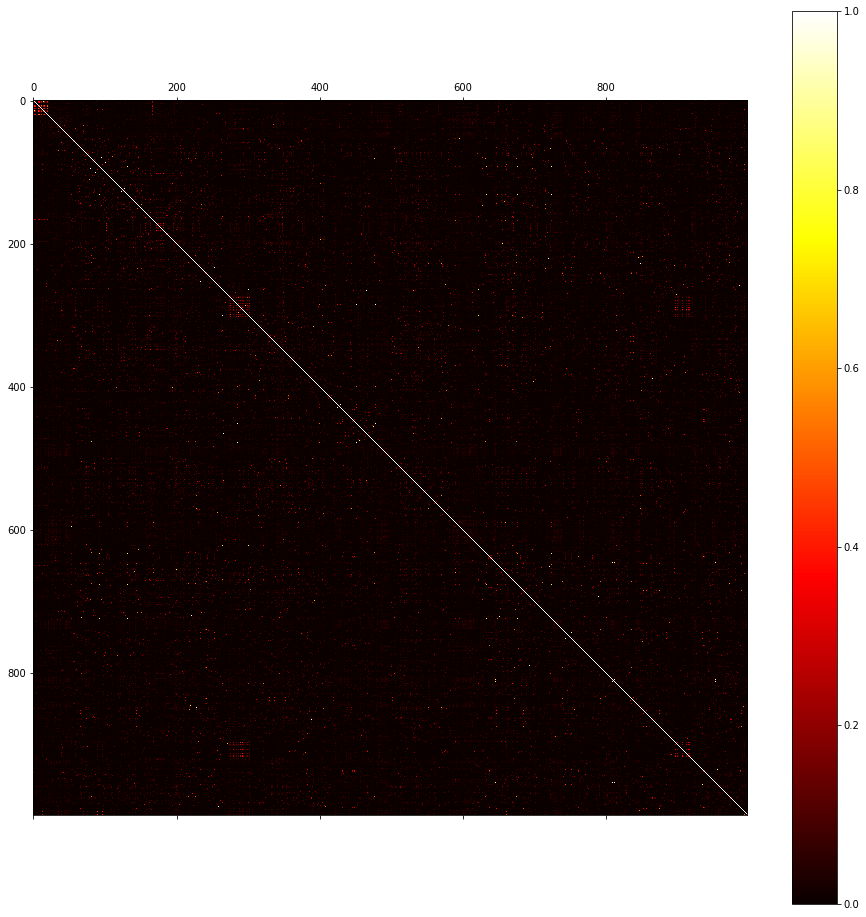

In [7]:
plt.matshow(matrix_jaccard, cmap='hot', vmin=0, vmax=1)
plt.colorbar()

## Dice from Jaccard

(998, 998)


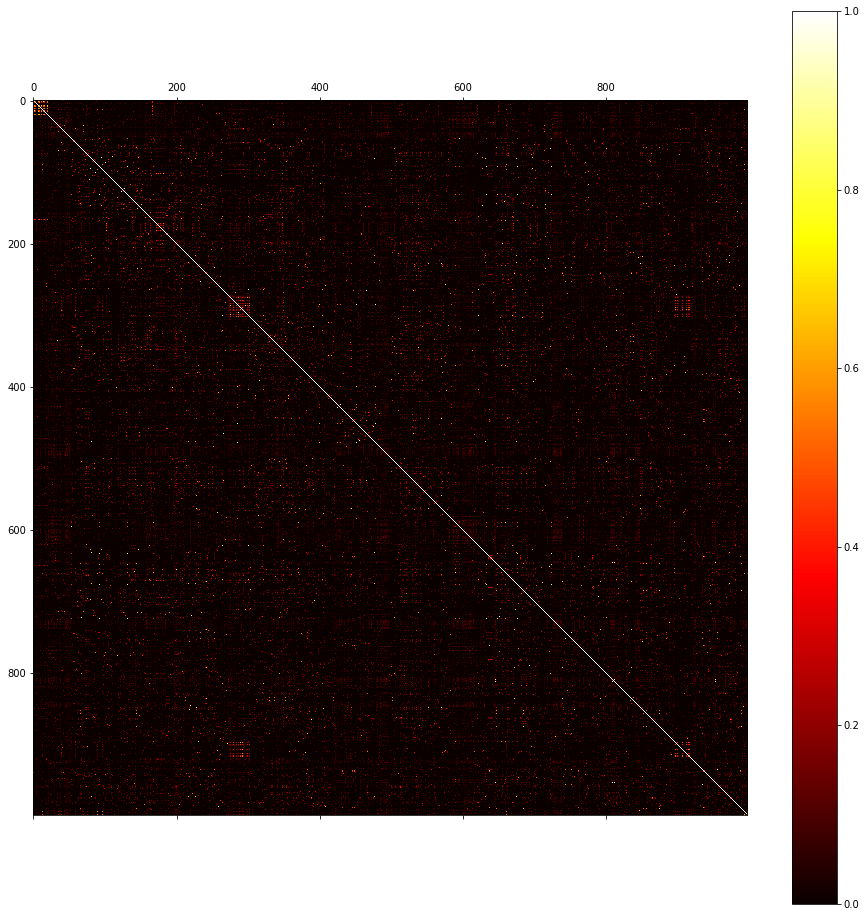

In [8]:
matrix_dice = 2*matrix_jaccard/(1 + matrix_jaccard)
print(matrix_dice.shape)

plt.matshow(matrix_dice, cmap='hot', vmin=0, vmax=1)
plt.colorbar()

## Jaccard disimilarity

(998, 998)


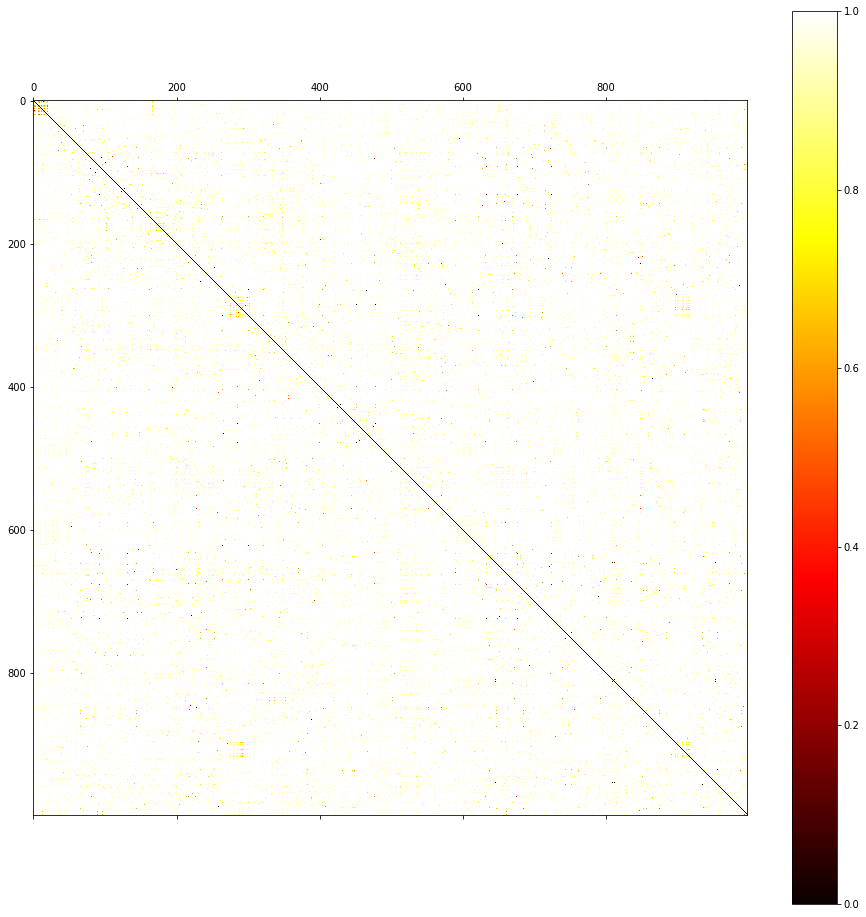

In [ ]:
matrix_jaccard_dis = 1 -matrix_jaccard
print(matrix_jaccard_dis.shape)

plt.matshow(matrix_jaccard_dis, cmap='hot', vmin=0, vmax=1)
plt.colorbar()

## word2vec similarity.

In [ ]:
plt.matshow(matrix_word2vec, cmap='hot', vmin=0, vmax=1)
plt.colorbar()

## Ordering matrices by means of jaccard similarities

- Top-Left: Most similar documents to the rest
- Bottom-Right: Least similar documents to the rest

In [ ]:
# Means of jaccard similarities
jaccard_similarity_mean = np.divide(np.sum(matrix_jaccard, axis=1), N)
# Array of indices to sort matrices  
jaccard_ordered_indices = jaccard_similarity_mean.argsort()[::-1]

#Plotting means of jaccard similarities
plt.plot(jaccard_similarity_mean[jaccard_ordered_indices], 'b.')
plt.show()

#Plotting ordered matrices 
plt.matshow(matrix_jaccard[:, jaccard_ordered_indices][jaccard_ordered_indices,:], cmap='hot', vmin=0, vmax=1)
plt.colorbar()
plt.matshow(matrix_word2vec[:, jaccard_ordered_indices][jaccard_ordered_indices,:], cmap='hot', vmin=0, vmax=1)
plt.colorbar()
plt.matshow(matrix_dice[:, jaccard_ordered_indices][jaccard_ordered_indices,:], cmap='hot', vmin=0, vmax=1)
plt.colorbar()
plt.matshow(matrix_jaccard_dis[:, jaccard_ordered_indices][jaccard_ordered_indices,:], cmap='hot', vmin=0, vmax=1)
plt.colorbar()

print(jaccard_similarity_mean.shape, matrix_jaccard.shape, jaccard_ordered_indices.shape)

## Ordering matrices by means of word2vec similarities

- Top-Left: Most similar documents to the rest
- Bottom-Right: Least similar documents to the rest

In [ ]:
# Means of word2vec similarities
word2vec_similarity_mean = np.divide(np.sum(matrix_word2vec, axis=1), N)
# Array of indices to sort matrices  
word2vec_ordered_indices = word2vec_similarity_mean.argsort()[::-1]

#Plotting means of word2vec similarities
plt.plot(word2vec_similarity_mean[word2vec_ordered_indices], 'b.')
plt.show()

#Plotting ordered matrices 
plt.matshow(matrix_word2vec[:, word2vec_ordered_indices][word2vec_ordered_indices,:], cmap='hot', vmin=0, vmax=1)
plt.colorbar()
plt.matshow(matrix_jaccard[:, word2vec_ordered_indices][word2vec_ordered_indices,:], cmap='hot', vmin=0, vmax=1)
plt.colorbar()
plt.matshow(matrix_dice[:, word2vec_ordered_indices][word2vec_ordered_indices,:], cmap='hot', vmin=0, vmax=1)
plt.colorbar()
plt.matshow(matrix_jaccard_dis[:, word2vec_ordered_indices][word2vec_ordered_indices,:], cmap='hot', vmin=0, vmax=1)
plt.colorbar()

print(word2vec_similarity_mean.shape, matrix_word2vec.shape, word2vec_ordered_indices.shape)

## Ordering matrices by means of dice similarities

- Top-Left: Most similar documents to the rest
- Bottom-Right: Least similar documents to the rest

In [ ]:
# Means of dice similarities
dice_similarity_mean = np.divide(np.sum(matrix_dice, axis=1), N)
# Array of indices to sort matrices  
dice_ordered_indices = dice_similarity_mean.argsort()[::-1]

#Plotting means of dice similarities
plt.plot(dice_similarity_mean[dice_ordered_indices], 'b.')
plt.show()

#Plotting sorted matrices 
plt.matshow(matrix_dice[:, dice_ordered_indices][dice_ordered_indices,:], cmap='hot', vmin=0, vmax=1)
plt.colorbar()
plt.matshow(matrix_word2vec[:, dice_ordered_indices][dice_ordered_indices,:], cmap='hot', vmin=0, vmax=1)
plt.colorbar()
plt.matshow(matrix_jaccard[:, dice_ordered_indices][dice_ordered_indices,:], cmap='hot', vmin=0, vmax=1)
plt.colorbar()
plt.matshow(matrix_jaccard_dis[:, dice_ordered_indices][dice_ordered_indices,:], cmap='hot', vmin=0, vmax=1)
plt.colorbar()

print(dice_similarity_mean.shape, matrix_dice.shape, dice_ordered_indices.shape)

In [ ]:
U, s, V = np.linalg.svd(matrix_word2vec, full_matrices=False)
s_sorted = s.argsort()[::-1]
print(s.shape, s_sorted.shape)
print(s_sorted[:10], s_sorted[-10:])
print(s[:10], s[-10:])

plt.matshow(matrix_word2vec[:, s_sorted][s_sorted,:], cmap='hot', vmin=0, vmax=1)
plt.colorbar()

S = np.diag(s[:3])
matrix_word2vec_ = np.dot(U[:,:3], np.dot(S, V[:3,:]))
plt.matshow(matrix_word2vec_[:, s_sorted][s_sorted,:], cmap='hot', vmin=0, vmax=1)
plt.colorbar()

In [ ]:
U, s, V = np.linalg.svd(matrix_jaccard, full_matrices=False)
s_sorted = s.argsort()[::-1]
print(s.shape, s_sorted.shape)
print(s_sorted[:10], s_sorted[-10:])
print(s[:10], s[-10:])

plt.matshow(matrix_jaccard[:, s_sorted][s_sorted,:], cmap='hot', vmin=0, vmax=1)
plt.colorbar()

S = np.diag(s[:3])
matrix_jaccard_ = np.dot(U[:,:3], np.dot(S, V[:3,:]))
plt.matshow(matrix_jaccard_[:, s_sorted][s_sorted,:], cmap='hot', vmin=0, vmax=1)
plt.colorbar()

In [ ]:
plt.matshow(matrix_jaccard_[:, word2vec_ordered_indices][word2vec_ordered_indices,:], cmap='hot', vmin=0, vmax=1)
plt.colorbar()
plt.matshow(matrix_word2vec_[:, jaccard_ordered_indices][jaccard_ordered_indices,:], cmap='hot', vmin=0, vmax=1)
plt.colorbar()